In [104]:
## Loading Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [98]:
## Make your own scoring function using sklearn

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer

## load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1,1:0})
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
y.value_counts()*100/len(y)

0    62.741652
1    37.258348
dtype: float64

### Define your own function for measurement in sklearn

In [22]:
## false negetive rate

def fnr(y_true,y_pred):
    y_pred_class = np.where(y_pred>0.37,1,0)
    tn,tp,fn,fp = confusion_matrix(y_true,y_pred_class,labels=[0,1]).ravel()
    FNR = fn/(fn+tp)
    return FNR

fnr_score = make_scorer(fnr,greater_is_better=False,needs_proba=False)

In [23]:
## random forest model
rf_model = RandomForestClassifier(n_estimators=100,max_depth=1,random_state=0,n_jobs=4)

## hyperparameter space

rf_param_grid = dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth = [1,2,3,4],
)

## search

clf = GridSearchCV(rf_model,rf_param_grid,scoring=fnr_score,cv=5)



In [24]:
search = clf.fit(X,y)

In [26]:
## best hyperparameters
search.best_params_

{'max_depth': 3, 'n_estimators': 1000}

In [27]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.731151,0.212509
1,"{'max_depth': 1, 'n_estimators': 20}",-0.904762,0.081036
2,"{'max_depth': 1, 'n_estimators': 50}",-0.811825,0.120650
3,"{'max_depth': 1, 'n_estimators': 100}",-0.695726,0.241438
4,"{'max_depth': 1, 'n_estimators': 200}",-0.691282,0.174130


Text(0.5, 0, 'Hyperparameter space')

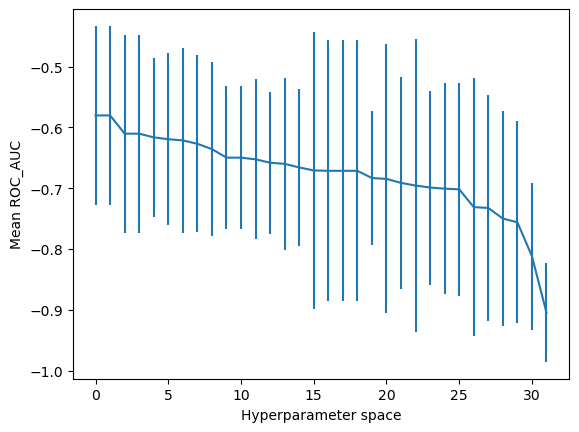

In [28]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')


### Using Sklearn metrics

In [30]:
## random forest model
rf_model = RandomForestClassifier(n_estimators=100,max_depth=1,random_state=0,n_jobs=4)

## hyperparameter space

rf_param_grid = dict(
    n_estimators=[10,20,50,100,200,500,1000],
    max_depth = [1,2,3,4],
)

## search

clf = GridSearchCV(rf_model,rf_param_grid,scoring='roc_auc',cv=5)
search = clf.fit(X,y)

## best hyperparameters
print(search.best_params_)

results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.head()

{'max_depth': 3, 'n_estimators': 50}


,params,mean_test_score,std_test_score
16,"{'max_depth': 3, 'n_estimators': 50}",0.991259,0.006165
24,"{'max_depth': 4, 'n_estimators': 100}",0.991127,0.006328
25,"{'max_depth': 4, 'n_estimators': 200}",0.990934,0.007120
17,"{'max_depth': 3, 'n_estimators': 100}",0.990736,0.006928
23,"{'max_depth': 4, 'n_estimators': 50}",0.990731,0.006593


### All K Fold Cross Validation Schemes

In [46]:
## K Fold Cross Validation

import numpy as np
from scipy.special import comb
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    train_test_split
)

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1,1:0})
X.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
## Split data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [37]:


logit = LogisticRegression(penalty='l2',C=10,solver='liblinear',random_state=4,max_iter=10000)

## K Fold cross validation
kf = KFold(n_splits=5,shuffle=True,random_state=4)

## Search
clf = cross_validate(logit,X_train,y_train,scoring='accuracy',return_train_score=True,cv=kf)

clf['test_score']

array([0.925     , 0.95      , 0.9625    , 0.96202532, 0.94936709])

In [38]:
clf['train_score']

array([0.97484277, 0.96540881, 0.96855346, 0.96865204, 0.97178683])

In [39]:
print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))

mean train set accuracy : 0.9698487805839789 +- 0.003209965360914518
mean test set accuracy : 0.9497784810126582 +- 0.013608919570498668


In [44]:
## Repeated K Fold cross validation
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=4)

## Search
clf = cross_validate(logit,X_train,y_train,scoring='accuracy',return_train_score=True,cv=kf)
# clf['test_score']

print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))

mean train set accuracy : 0.9672739102147041 +- 0.007080663431228094
mean test set accuracy : 0.9520094936708862 +- 0.023418004830650232


In [45]:
## Leave one out cross validation
kf = LeaveOneOut()

## Search
clf = cross_validate(logit,X_train,y_train,scoring='accuracy',return_train_score=True,cv=kf)
# clf['test_score']

print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))


mean train set accuracy : 0.9655076389504197 +- 0.0032006584843151777
mean test set accuracy : 0.9547738693467337 +- 0.20779972993100837


In [ ]:
## Leave P Out
## Too memory intensive dont run

kf = LeavePOut(p=2)

## Search
clf = cross_validate(logit,X_train,y_train,scoring='accuracy',return_train_score=True,cv=kf)
# clf['test_score']

print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))


In [47]:
## Stratified cross validation
## Too memory intensive dont run

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4)

## Search
clf = cross_validate(logit,X_train,y_train,scoring='accuracy',return_train_score=True,cv=kf)
# clf['test_score']

print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))


mean train set accuracy : 0.9692178781964078 +- 0.004190472584327076
mean test set accuracy : 0.9521518987341772 +- 0.021933050963406156


In [56]:
## Complete demo for cross validation of logistic regression

## K Fold Cross Validation

import numpy as np
from scipy.special import comb
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    GridSearchCV,
    train_test_split
)

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1,1:0})
X.head()

## Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Define Model

logit = LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)

## hyperparameter space
param_grid = dict(
    penalty =['l1','l2'],
    C=[0.1,1,10],
)

## k fold cross validation

kfold = KFold(n_splits=5,shuffle=True,random_state=4)

## Search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=kfold,
    refit=True ## once best model is identified , the model is trained on complete data
)

## Fit the model

search = clf.fit(X_train,y_train)

## Best hyperparameters

search.best_params_





{'C': 10, 'penalty': 'l2'}

In [57]:
## Let's get the predictions

train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print("Train Accuracy: ",accuracy_score(y_train,train_preds))
print("Test Accuracy: ",accuracy_score(y_test,test_preds))

Train Accuracy:  0.9623115577889447
Test Accuracy:  0.9532163742690059


In [58]:
## Repeated K Fold cross validation

## Complete demo for cross validation of logistic regression

## K Fold Cross Validation

import numpy as np
from scipy.special import comb
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    GridSearchCV,
    train_test_split
)

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1,1:0})
X.head()

## Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Define Model

logit = LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)

## hyperparameter space
param_grid = dict(
    penalty =['l1','l2'],
    C=[0.1,1,10],
)

## k fold cross validation

kfold = RepeatedKFold(n_splits=5,n_repeats=10,random_state=4)

## Search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=kfold,
    refit=True ## once best model is identified , the model is trained on complete data
)

## Fit the model

search = clf.fit(X_train,y_train)

## Best hyperparameters

search.best_params_





{'C': 10, 'penalty': 'l1'}

In [59]:
## Let's get the predictions

train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print("Train Accuracy: ",accuracy_score(y_train,train_preds))
print("Test Accuracy: ",accuracy_score(y_test,test_preds))

Train Accuracy:  0.9748743718592965
Test Accuracy:  0.9707602339181286


### Group Cross Validation

In [60]:
from sklearn.model_selection import (
    GroupKFold,
    LeaveOneGroupOut,
    LeavePGroupsOut,
    cross_validate,
    GridSearchCV
)

In [64]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1,1:0})

## Add patients arbitary to represent group information

patient_list = [p for p in range(10)]

In [72]:
X['patient'] = np.random.choice(patient_list,size=len(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patient
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,9
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,6
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,5


In [68]:
print("Unique Values for patients :",X.patient.nunique())


Unique Values for patients : 10


In [77]:
## Split data into train and test set

X_train = X[X['patient'] != 7]
y_train = y.iloc[X_train.index]

X_test = X[X['patient'] == 7]
y_test = y.iloc[X_test.index]

In [78]:
## Define Model
logit = LogisticRegression(penalty='l2',C=10,solver='liblinear',random_state=10,max_iter=10000)

## Group k fold cross validation

kv = GroupKFold(n_splits=5)

clf = cross_validate(logit,
                    X_train.drop('patient',axis=1),
                    y_train,
                    scoring='accuracy',
                    return_train_score=True,
                    cv=kv.split(X_train.drop('patient',axis=1),y_train,groups=X_train['patient']))

In [80]:
clf['test_score']

array([0.93846154, 0.95495495, 0.93636364, 0.97196262, 0.95454545])

In [81]:
print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))


mean train set accuracy : 0.9671812994937088 +- 0.004248694548886356
mean test set accuracy : 0.9512576402296029 +- 0.012951814440312414


In [82]:
logit.fit(X_train.drop('patient',axis=1),y_train)

## predictions
train_preds = logit.predict(X_train.drop('patient',axis=1))
test_preds = logit.predict(X_test.drop('patient',axis=1))

In [83]:
print("Train Accuracy: ",accuracy_score(y_train,train_preds))
print("Test Accuracy: ",accuracy_score(y_test,test_preds))

Train Accuracy:  0.9642147117296223
Test Accuracy:  0.9545454545454546


In [101]:
kf

StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

In [111]:
### Basic Search Algorithms

## 1. Manual Search
## Manually setting the hyperparameters by observing the output of the data
## Here i have manually adjusted estimators by keeping depth constant , later i have tuned max_depth

rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=2,
    random_state=0,
    n_jobs=4)

clf = cross_validate(
    rf,
    X_train,
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=kf
)


print("mean train set accuracy :",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("mean test set accuracy :",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))

rf.fit(X_train,y_train)
## predictions
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

print("Train Accuracy: ",accuracy_score(y_train,train_preds))
print("Test Accuracy: ",accuracy_score(y_test,test_preds))






mean train set accuracy : 0.9602385096848266 +- 0.006486003295777397
mean test set accuracy : 0.9304950495049505 +- 0.0196245516421191
Train Accuracy:  0.9622266401590457
Test Accuracy:  0.9242424242424242


In [119]:
## 2. Grid Search
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split
)

## load datasets

breast_cancer_X,breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1,1:0})
X.head()
## Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)

### Grid search

## setup the model
gbm = GradientBoostingClassifier(random_state=0)

## determine hyperparameter space

param_grid = dict(
    n_estimators=[10,20,50,100],
    min_samples_split = [0.1,0.3,0.5],
    max_depth=[1,2,3,4,None]
)

print("Number of hyperparameter combinations: ",len(param_grid['n_estimators'])*len(param_grid['min_samples_split'])*len(param_grid['max_depth']))

## setup search

search = GridSearchCV(gbm,param_grid,scoring='roc_auc',cv=5,refit=True)

## find the best parameters

search.fit(X_train,y_train)

(398, 30)
(171, 30)
Number of hyperparameter combinations:  60


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, None],
                         'min_samples_split': [0.1, 0.3, 0.5],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [121]:
search.best_params_

results = pd.DataFrame(search.cv_results_)
print(results.shape)
results.head()

(60, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020964,0.011130,0.009191,0.012555,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58
1,0.024035,0.001922,0.002850,0.000349,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.978333,0.952000,0.968667,0.986897,0.970068,0.971193,0.011607,52
2,0.049481,0.004912,0.004558,0.000809,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.997000,0.963667,0.983333,0.993103,0.980272,0.983475,0.011647,33
3,0.080808,0.005248,0.003126,0.000819,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.974333,0.988667,0.997241,0.983673,0.988783,0.009298,17
4,0.010973,0.001752,0.001719,0.000164,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58


In [122]:
results.sort_values(by=['mean_test_score'],ascending=False,inplace=True)
results[['param_max_depth','param_min_samples_split','param_n_estimators','mean_test_score','std_test_score']]

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
15,2,0.1,100,0.992415,0.006426
19,2,0.3,100,0.992013,0.006461
35,3,0.5,100,0.991949,0.006547
47,4,0.5,100,0.991620,0.007117
23,2,0.5,100,0.991545,0.006363
27,3,0.1,100,0.991493,0.008803
31,3,0.3,100,0.991213,0.008701
14,2,0.1,50,0.990654,0.006486
39,4,0.1,100,0.990552,0.009693
59,None,0.5,100,0.990424,0.009453


In [124]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds  = search.predict_proba(X_test)[:,1]

print("Train roc_auc: ",roc_auc_score(y_train,X_train_preds))
print("Test roc_auc: ",roc_auc_score(y_test,X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.996766607877719


In [127]:
## Lets make a function to evaluate the model performance based on single hyperparameters

def summarize_by_param(hparam):
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['std_test_score'].std(),
    ],axis=1)
    
    return tmp

tmp = summarize_by_param('param_n_estimators')
tmp.head()
    


,mean_test_score,std_test_score
param_n_estimators,,
10,0.973359,0.002533
20,0.980845,0.001396
50,0.987399,0.001961
100,0.990123,0.001426


Text(0, 0.5, 'roc-auc')

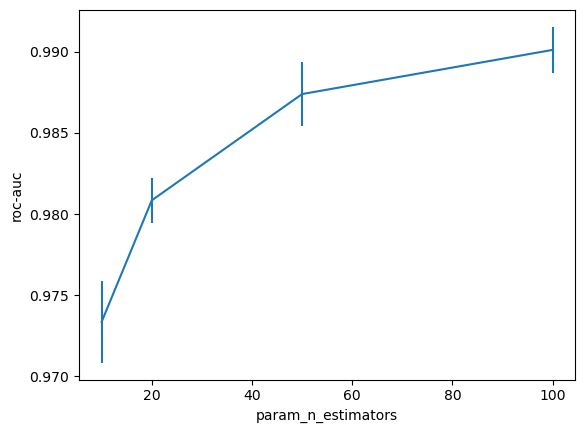

In [128]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],subplots=True)
plt.ylabel('roc-auc')

#### Optimal hyperparameter seems to be between 60 and 100

Text(0, 0.5, 'roc-auc')

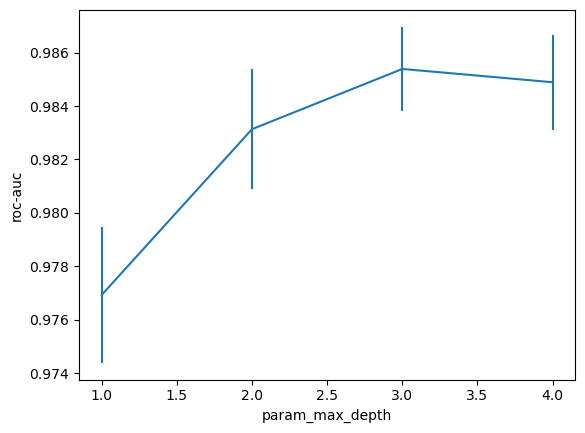

In [130]:
tmp = summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],subplots=True)
plt.ylabel('roc-auc')

#### Optimal hyperparameter seems to be between 2 and 3

In [132]:
## Grid Search with 2 hyperparameter space

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split
)


## setup the model
svm = SVC(random_state=0)

## determine hyperparameter space

param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]





In [133]:
## setup the search
search = GridSearchCV(svm,param_grid,scoring='accuracy',cv=3,refit=True)

## find best parameters
search.fit(X_train,y_train)



GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [138]:
search.best_params_
results = pd.DataFrame(search.cv_results_)
print(results.shape)
results.sort_values(by=['mean_test_score'],ascending=False,inplace=True)
results = results[['param_C','param_kernel','param_gamma','mean_test_score','std_test_score']]
results.head()

(12, 14)


,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
2,100,linear,NaN,0.949780,0.028971
1,10,linear,NaN,0.949761,0.024788
0,1,linear,NaN,0.942223,0.012729
7,10,rbf,0.0001,0.937116,0.020053
3,1000,linear,NaN,0.932179,0.040229


In [139]:
## Random Search

from scipy import stats
from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split
)

In [141]:
## setup the model
gbm = GradientBoostingClassifier(random_state=0)

param_grid = dict(
    n_estimators=stats.randint(10,120),
    min_samples_split= stats.uniform(0,1),
    max_depth = stats.randint(1,5),
    loss = ('deviance','exponential')

)

## setup the search

search = RandomizedSearchCV(gbm,param_grid,scoring='roc_auc',cv=5,n_iter=60,random_state=10,n_jobs=4,refit=True)
search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=60, n_jobs=4,
                   param_distributions={'loss': ('deviance', 'exponential'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9063558e50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f90632012e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9063b3c160>},
                   random_state=10, scoring='roc_auc')

In [142]:
search.best_params_

{'loss': 'exponential',
 'max_depth': 3,
 'min_samples_split': 0.5345579488018151,
 'n_estimators': 99}

In [146]:
search.best_params_
results = pd.DataFrame(search.cv_results_)
print(results.shape)
results.sort_values(by=['mean_test_score'],ascending=False,inplace=True)
results[['param_max_depth','param_min_samples_split','param_n_estimators','mean_test_score','std_test_score']]
results.head(3)

(60, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.156969,0.014518,0.002256,0.000348,exponential,3,0.534558,99,"{'loss': 'exponential', 'max_depth': 3, 'min_s...",1.0,0.980667,0.990667,0.997241,0.997279,0.993171,0.006967,1
29,0.186146,0.028153,0.002350,0.000683,deviance,2,0.043097,115,"{'loss': 'deviance', 'max_depth': 2, 'min_samp...",1.0,0.982667,0.990667,0.995172,0.995918,0.992885,0.005906,2
0,0.109649,0.006923,0.002123,0.000110,exponential,2,0.020752,74,"{'loss': 'exponential', 'max_depth': 2, 'min_s...",1.0,0.983333,0.989333,0.999310,0.991837,0.992763,0.006273,3


In [147]:
## worst performing models

results.tail(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
58,0.015990,0.000916,0.002264,0.000429,deviance,1,0.653623,14,"{'loss': 'deviance', 'max_depth': 1, 'min_samp...",0.978333,0.951333,0.969333,0.984138,0.963605,0.969349,0.011463,58
57,0.011987,0.001739,0.002157,0.000107,deviance,1,0.10462,10,"{'loss': 'deviance', 'max_depth': 1, 'min_samp...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,59
31,0.009734,0.000167,0.001766,0.000110,exponential,2,0.820704,10,"{'loss': 'exponential', 'max_depth': 2, 'min_s...",0.978333,0.953000,0.966667,0.981724,0.941497,0.964244,0.015191,60


In [148]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds  = search.predict_proba(X_test)[:,1]

print("Train roc_auc: ",roc_auc_score(y_train,X_train_preds))
print("Test roc_auc: ",roc_auc_score(y_test,X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.9988242210464433


In [151]:
tmp = summarize_by_param('param_n_estimators')
tmp.head()

,mean_test_score,std_test_score
param_n_estimators,,
10,0.964246,0.000590
14,0.969349,NaN
16,0.979216,NaN
17,0.984554,NaN
18,0.976262,0.004068


Text(0, 0.5, 'roc-auc')

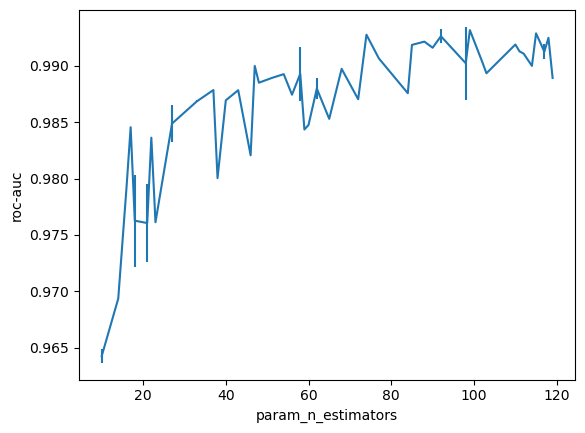

In [152]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],subplots=True)
plt.ylabel('roc-auc')

In [157]:
#!pip install scikit-optimize

### Random search using Scikit Optimize and HyperOpt

In [160]:
### Scikit Optimize Steps
## 1. define a model
## 2. decide which parameters to optimize
## 3. define the objective function we want to optimize

from sklearn.model_selection import cross_val_score
from skopt import dummy_minimize ## for random search
from skopt.plots import plot_convergence
from skopt.space import Real,Integer,Categorical
from skopt.utils import use_named_args


# With Integer, we create a space of integers, sampled uniformly
# between the minimum and maximum indicated values

Integer(10, 120, name="n_estimators")

# With Real, we create a space of real values, sampled uniformly
# between the minimum and maximum indicated values

Real(0, 1, name="min_samples_split")

# With Categorical, we create a space of categories

Categorical(['deviance', 'exponential'], name="loss")

# determine the hyperparameter space

param_grid = [
    Integer(10, 120, name="n_estimators"),
    Real(0, 0.999, name="min_samples_split"),
    Integer(1, 5, name="max_depth"),
    Categorical(['deviance', 'exponential'], name="loss"),
]

# Scikit-optimize parameter grid is a list
type(param_grid)




# set up the gradient boosting classifier
gbm = GradientBoostingClassifier(random_state=0)

## Define the objective function
# We design a function to maximize the accuracy, of a GBM,
# with cross-validation

# the decorator allows our objective function to receive the parameters as
# keyword arguments. This is a requirement for scikit-optimize.

@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    gbm.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            gbm, 
            X_train,
            y_train,
            cv=3,
            n_jobs=-4,
            scoring='accuracy')
    )

    # negate because we need to minimize
    return -value

# dummy_minimize performs the randomized search

search = dummy_minimize(
    objective,  # the objective function to minimize
    param_grid,  # the hyperparameter space
    n_calls=50,  # the number of subsequent evaluations of f(x)
    random_state=0,
)

# function value at the minimum.
# note that it is the negative of the accuracy

"Best score=%.4f" % search.fun




'Best score=-0.9673'

In [161]:


print("""Best parameters:
=========================
- n_estimators=%d
- min_samples_split=%.6f
- max_depth=%d
- loss=%s""" % (search.x[0], 
                search.x[1],
                search.x[2],
                search.x[3]))



Best parameters:
- n_estimators=112
- min_samples_split=0.669967
- max_depth=3
- loss=deviance


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

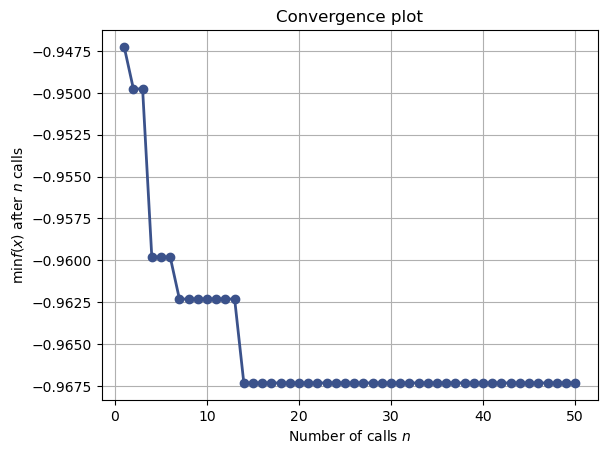

In [162]:
plot_convergence(search)

In [171]:
### HyperOpt for randomize search
# !pip install hyperopt
# !pip install xgboost
## steps
##1. Define objective function to minimize -> fmin
##2. Hyperparameter space hp
##3. Search Algorithms --> rand, tpe, anneal

import xgboost as xgb
from hyperopt import hp, rand, fmin, Trials

## param grid

param_grid = {
    'n_estimators':hp.quniform('n_estimators',200,2500,100),
    'max_depth':hp.uniform('max_depth',1,10),
    'learning_rate':hp.uniform('learning_rate',0.01,0.99),
    'booster':hp.choice('booster',['gbtree','dart']),
    'gamma':hp.quniform('gamma',0.01,10,0.1),
    'subsample':hp.uniform('subsample',0.5,0.9),
    'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.99),
    'colsample_bylevel':hp.uniform('colsample_bylevel',0.5,0.99),
    'colsample_bynode':hp.uniform('colsample_bynode',0.5,0.99),
    'reg_lambda':hp.uniform('reg_lambda',1,20),
}


In [172]:
## define objective function

def objective(params):

    # we need a dictionary to indicate which value from the space
    # to attribute to each value of the hyperparameter in the xgb
    params_dict = {
        'n_estimators': int(params['n_estimators']), # important int, as it takes integers only
        'max_depth': int(params['max_depth']), # important int, as it takes integers only
        'learning_rate': params['learning_rate'],
        'booster': params['booster'],
        'gamma': params['gamma'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'colsample_bylevel': params['colsample_bylevel'],
        'colsample_bynode': params['colsample_bynode'],
        'random_state': 1000,
    }

    # with ** we pass the items in the dictionary as parameters
    # to the xgb
    gbm = xgb.XGBClassifier(**params_dict)

    # train with cv
    score = cross_val_score(gbm, X_train, y_train,
                            scoring='accuracy', cv=5, n_jobs=4).mean()

    # to minimize, we negate the score
    return -score
    

In [173]:
# fmin performs the minimization
# rand.suggest samples the parameters at random
# i.e., performs the random search

search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.default_rng(42),
    algo=rand.suggest,  # randomized search
)

100%|████████| 50/50 [02:06<00:00,  2.52s/trial, best loss: -0.9598417721518986]


In [174]:
print(type(search))
search


<class 'dict'>


{'booster': 1,
 'colsample_bylevel': 0.6467354331710946,
 'colsample_bynode': 0.5382300895255043,
 'colsample_bytree': 0.614920775728292,
 'gamma': 1.5,
 'learning_rate': 0.153675095571702,
 'max_depth': 9.788727737459665,
 'n_estimators': 1000.0,
 'reg_lambda': 2.9585592565946697,
 'subsample': 0.6299796125452439}

In [175]:
# create another dictionary to pass the search items as parameters
# to a new xgb

best_hp_dict = {
        'n_estimators': int(search['n_estimators']), # important int, as it takes integers only
        'max_depth': int(search['max_depth']), # important int, as it takes integers only
        'learning_rate': search['learning_rate'],
        'booster': 'gbtree',
        'gamma': search['gamma'],
        'subsample': search['subsample'],
        'colsample_bytree': search['colsample_bytree'],
        'colsample_bylevel': search['colsample_bylevel'],
        'colsample_bynode': search['colsample_bynode'],
        'random_state': 1000,
}

# after the search we can train the model with the
# best parameters manually

gbm_final = xgb.XGBClassifier(**best_hp_dict)
gbm_final.fit(X_train, y_train)



XGBClassifier(colsample_bylevel=0.6467354331710946,
              colsample_bynode=0.5382300895255043,
              colsample_bytree=0.614920775728292, gamma=1.5,
              learning_rate=0.153675095571702, max_depth=9, n_estimators=1000,
              random_state=1000, subsample=0.6299796125452439)

In [176]:
X_train_preds = gbm_final.predict(X_train)
X_test_preds = gbm_final.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy: ', accuracy_score(y_test, X_test_preds))

Train accuracy:  0.9949748743718593
Test accuracy:  0.9766081871345029


In [177]:
## Evaluating Search using Trails = to store more information
## We can use Trials if we want to look into the search, and the performance values encountered during the process.

trials = Trials()
second_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.default_rng(42),
    algo=rand.suggest,  # randomized search
    trials = trials
)



# best hyperparameters

second_search




100%|████████| 50/50 [02:06<00:00,  2.53s/trial, best loss: -0.9598417721518986]


{'booster': 1,
 'colsample_bylevel': 0.6467354331710946,
 'colsample_bynode': 0.5382300895255043,
 'colsample_bytree': 0.614920775728292,
 'gamma': 1.5,
 'learning_rate': 0.153675095571702,
 'max_depth': 9.788727737459665,
 'n_estimators': 1000.0,
 'reg_lambda': 2.9585592565946697,
 'subsample': 0.6299796125452439}

In [178]:
# the best hyperparameters can also be found in
# trials

trials.argmin

{'booster': 1,
 'colsample_bylevel': 0.6467354331710946,
 'colsample_bynode': 0.5382300895255043,
 'colsample_bytree': 0.614920775728292,
 'gamma': 1.5,
 'learning_rate': 0.153675095571702,
 'max_depth': 9.788727737459665,
 'n_estimators': 1000.0,
 'reg_lambda': 2.9585592565946697,
 'subsample': 0.6299796125452439}

In [179]:
# the search hyperparameter combinations

pd.DataFrame(trials.vals).head()



,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,reg_lambda,subsample
0,0,0.737251,0.658760,0.850624,1.1,0.762499,6.865682,2200.0,12.782261,0.825462
1,0,0.667518,0.502689,0.933592,0.8,0.562807,1.539426,2200.0,12.556734,0.620169
2,1,0.826309,0.757590,0.936663,8.2,0.571274,2.414617,1600.0,2.399559,0.558785
3,0,0.623687,0.785930,0.600911,5.0,0.082438,7.340140,1600.0,5.032125,0.661511
4,0,0.832376,0.873171,0.746166,4.0,0.341402,4.115067,900.0,2.836248,0.701162


In [180]:
# the results

pd.DataFrame(trials.results).head()



,loss,status
0,-0.957247,ok
1,-0.957342,ok
2,-0.939715,ok
3,-0.944747,ok
4,-0.949778,ok


In [190]:
trials.average_best_error()

-0.9598417721518986

In [193]:


results = pd.concat([
    pd.DataFrame(trials.vals),
    pd.DataFrame(trials.results)],
    axis=1,
).sort_values(by='loss', ascending=True).reset_index(drop=True)

results.head()



,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,reg_lambda,subsample,loss,status
0,0,0.979435,0.902776,0.534364,0.6,0.824866,9.913400,1900.0,19.093895,0.805569,-0.959842,ok
1,0,0.656966,0.940312,0.578677,1.9,0.389180,2.111964,2200.0,15.188768,0.509284,-0.959842,ok
2,1,0.646735,0.538230,0.614921,1.5,0.153675,9.788728,1000.0,2.958559,0.629980,-0.959842,ok
3,1,0.716864,0.702080,0.789633,2.5,0.118038,9.765532,200.0,18.208901,0.592984,-0.957373,ok
4,0,0.667518,0.502689,0.933592,0.8,0.562807,1.539426,2200.0,12.556734,0.620169,-0.957342,ok


Text(0.5, 0, 'Hyperparam combination')

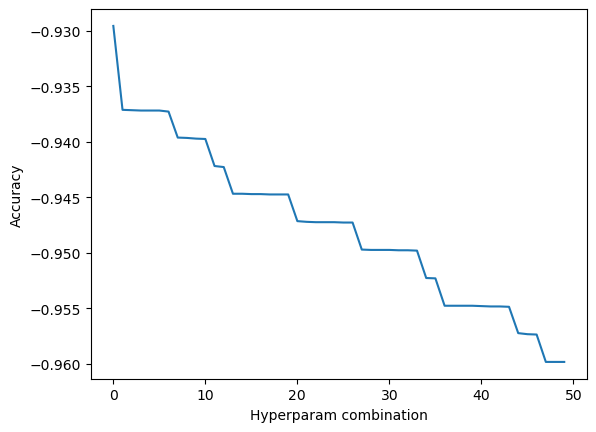

In [182]:


results['loss'].plot()
plt.ylabel('Accuracy')
plt.xlabel('Hyperparam combination')



In [183]:


pd.DataFrame(trials.results)['loss'].min()



-0.9598417721518986